In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6437453084099901864
xla_global_id: -1
]


In [2]:
import re
import torch
import pandas as pd

device= torch.device('cuda:0'
                     if torch.cuda.is_available()
                     else 'cpu')
print("device: ", device)

device:  cpu


In [3]:
df=pd.read_excel(r"C:\Users\user\xfilter\X_filter\알고리즘\욕 데이터\Sentence data1.xlsx")

str_data = df['Sentence'].astype(str).tolist()

# 'Sentence' 칼럼의 값을 하나의 문자열로 결합
all_sentences = ' '.join(str_data)

print(df.shape)
df.head()

(99, 2)


,Sentence,label
0,좌배 까는건 ㅇㅂ,1
1,집에 롱 패딩만 세 개다. 10년 더 입어야지 ㅋㅋ,0
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1
3,세탁이라고 봐도 된다,0
4,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1


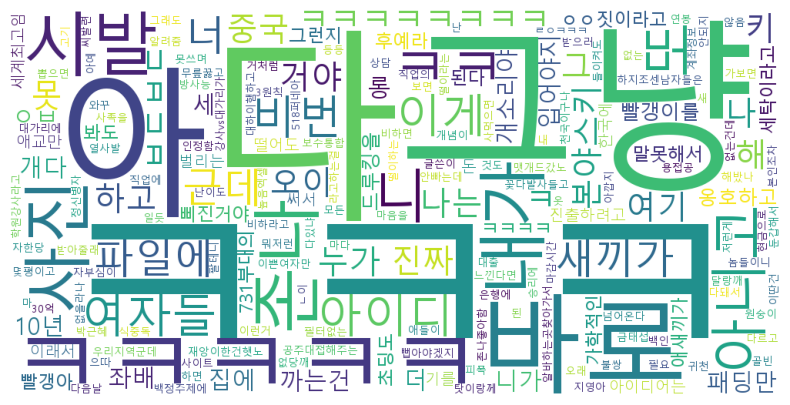

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# WordCloud 객체 생성
wordcloud = WordCloud(width=1000, 
                      height=500, 
                      background_color='white', 
                      font_path=r"C:\Windows\Fonts\malgun.ttf")

wordcloud.generate(all_sentences)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  # x와 y축 레이블 숨기기
plt.show()


In [5]:
null_idx=df[df.label.isnull()].index
df.loc[null_idx,"Sentence"]

df.loc[null_idx,"label"]=df.loc[null_idx,"Sentence"].apply(lambda x:x[-1])
df.loc[null_idx,"Sentence"]=df.loc[null_idx,"Sentence"].apply(lambda x: x[-2])

In [6]:
train_data=df.sample(frac=0.8,random_state=42)
test_data=df.drop(train_data.index)
print('중복 제거 전 학습 데이터셋 : {}'.format(len(train_data)))
print('중복 제거 전 테스트 데이터셋 : {}'.format(len(test_data)))

train_data.drop_duplicates(subset=["Sentence"],inplace=True)
test_data.drop_duplicates(subset=["Sentence"],inplace=True)
print('중복 제거 후 학습 데이터셋 : {}'.format(len(train_data)))
print('중복 제거 후 테스트 데이터셋 : {}'.format(len(test_data)))


중복 제거 전 학습 데이터셋 : 79
중복 제거 전 테스트 데이터셋 : 20
중복 제거 후 학습 데이터셋 : 79
중복 제거 후 테스트 데이터셋 : 20


In [7]:
from transformers import ElectraTokenizer,ElectraForSequenceClassification,TFElectraForSequenceClassification,AutoTokenizer,AutoModelForSequenceClassification,TrainingArguments,Trainer
import torch
model_name="beomi/KcELECTRA-base"
tokenizer=AutoTokenizer.from_pretrained(model_name)

c:\Users\user\anaconda3\envs\conda38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
tokenized_train_sentences=tokenizer(
    list(train_data["Sentence"]),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

In [9]:
tokenized_test_sentences=tokenizer(
    list(test_data["Sentence"]),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

In [10]:
print(tokenized_train_sentences[0])
print(tokenized_train_sentences[0].tokens)
print(tokenized_train_sentences[0].ids)

Encoding(num_tokens=72, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['ĠëĤĺ', 'ĠíĤ¤', 'Ġ18', '3', 'ìĿ¸ëį°', 'ĠìĤ¬ëŀĮëĵ¤', 'ëģ¼ë¦¬', 'ìŀĪìĿĦëķĮ', 'ĠëĪĦê°Ģ', 'ĠìŀĲê¸°', 'íĤ¤', 'Ġ17', '7', 'ìĿ´ëĿ¼', 'íķĺë©´', 'ĠëĤĺëĬĶ', 'Ġ"', 'ìĸ´', '?', 'ĠëĤ´', 'íĤ¤ëĬĶ', 'Ġ17', '5', 'ìĿ¸ëį°', '?"', 'íķ´ì£¼ë©´', 'Ġì£¼ë³Ģ', 'ìĤ¬ëŀĮëĵ¤ìĿ´', 'Ġìĺ¤', 'ìĺ¤', 'ĠëĦĪíĿ¬', 'ĠëĳĺìĿ´', 'ĠíĤ¤', 'ìŀ¬ë', '´ĲëĿ¼', 'ĠíķĺëĬĶëį°', 'ĠíĤ¤', 'ìŀ¬ë', '©´', 'ĠëĤ´ê°Ģ', 'ĠëįĶ', 'íģ¼', 'Ġãħĭãħĭãħĭ', 'ĠìĬ¬íį¼', 'íķĺëĬĶ', 'ëª¨ìĬµ', 'ë³´', 'ëĬĶê±°', 'Ġê°ľê¿Ģ', 'ìŀ¼', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
[349, 1981, 2689, 23, 719, 1535, 2513, 26448, 1114, 1018, 749, 7223, 27, 529, 602, 2265, 1617, 319, 33, 666, 15158, 7223, 25, 719, 15637, 11470, 2696, 5079, 578, 544, 2015, 5831, 1981, 768, 1877, 1955, 1981, 768, 291, 1492, 482

In [11]:
class CurseDataset(torch.utils.data.Dataset):
    def __init__(self, encoding, labels):
        self.encoding=encoding
        self.labels=labels
        
    def __getitem__(self,idx):
        item = {key: val[idx].clone().detach() for key, val in self.encoding.items()}
        item["labels"] = self.labels[idx]
        return item
    def __len__(self):
        return len(self.labels)

In [12]:
train_label=train_data["label"].values
test_label=test_data["label"].values

train_dataset=CurseDataset(tokenized_train_sentences,train_label)
test_dataset=CurseDataset(tokenized_test_sentences,test_label)


In [13]:
model=AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.to(device)

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30000, 768, padding_idx=3)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [14]:
training_args=TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=64,
    logging_dir='./logs',
    logging_steps=100,
    save_total_limit=2,
)

In [24]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# 학습과정에서 사용할 평가지표를 위한 함수 설정
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # 정밀도, 재현율, f1 구하기 
  precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
  # 정확도 구하기
  acc = accuracy_score(labels, preds)
  return{
      'accuracy': acc,
      'f1': f1,
      'precision': precision,
      'recall': recall
  }

In [25]:
trainer=Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_data,
    compute_metrics=compute_metrics,
)

In [26]:
trainer.train()

                      
                                                 
100%|██████████| 100/100 [05:48<00:00,  3.48s/it]

{'loss': 0.0037, 'learning_rate': 0.0, 'epoch': 10.0}
{'train_runtime': 348.2583, 'train_samples_per_second': 2.268, 'train_steps_per_second': 0.287, 'train_loss': 0.0036634749174118044, 'epoch': 10.0}


TrainOutput(global_step=100, training_loss=0.0036634749174118044, metrics={'train_runtime': 348.2583, 'train_samples_per_second': 2.268, 'train_steps_per_second': 0.287, 'train_loss': 0.0036634749174118044, 'epoch': 10.0})

In [28]:
results=trainer.evaluate(eval_dataset=test_dataset,
                         metric_key_prefix='custom_')
print(results)

100%|██████████| 1/1 [00:00<00:00, 61.36it/s]

{'custom__loss': 1.2277162075042725, 'custom__accuracy': 0.85, 'custom__f1': 0.7272727272727273, 'custom__precision': 1.0, 'custom__recall': 0.5714285714285714, 'custom__runtime': 0.9812, 'custom__samples_per_second': 20.383, 'custom__steps_per_second': 1.019, 'epoch': 10.0}


In [30]:
def sentence_predict(sent):
    model.eval()
    
    tokenized_sent=tokenizer(
        sent,
        return_tensors="pt",
        truncation=True,
        add_special_tokens=True,
        max_length=128
    )
    with torch.no_grad():
        outputs=model(
            input_ids=tokenized_sent["input_ids"],
            attention_mask=tokenized_sent["attention_mask"],
            token_type_ids=tokenized_sent["token_type_ids"]
        )
    logits=outputs[0]
    logits=logits.detach().cpu()
    result=logits.argmax(-1)
    sentence=True
    input_sentence=tokenized_sent["input_ids"]
    if results==0:
        sentence=True 
    elif results==1:
        sentence=False
    return sentence,input_sentence
sentence_predict("씨발")  

(True, tensor([[2295,  640]]))

In [33]:
def found_word(input_sentence, found_bad_word):
    result = input_sentence
    if found_bad_word:
        result = badword_find(result)
    return result

def badword_find(input_sentence):
    result = input_sentence
    badword_df = pd.read_excel(r'C:\Users\user\xfilter\X_filter\알고리즘\욕 데이터\word_list.xlsx')
    
    found_bad_word = False  # 입력 문장에 단어가 발견되었는지를 나타내는 플래그
    for idx, row in badword_df.iterrows():
        if row["WORD"] in input_sentence:
            # 'WORD'가 입력 문장에 포함된 경우
            new_word = row["대체어"]
            if not pd.isnull(new_word):
                result = result.replace(row["WORD"], new_word)
                found_bad_word = True
                break  # 대체어를 찾았으므로 반복문 종료
            else:
                # result = result.replace(row["WORD"], "*" * len(row["WORD"]))
                result = "욕설을 사용했습니다."
                found_bad_word = True
    
    if not found_bad_word:
        # result = "@" * len(input_sentence)
        result = "혐오 표현입니다."
    return result

# 테스트
input_sentence = "아가리"
speak_result = badword_find(input_sentence)
print(speak_result)

입


In [34]:
badword_find(input_sentence)
#알고리즘 실험

'입'

In [36]:
def speak(sent):
    sentence=sentence_predict(sent)
    if sentence[0]==False:
        return sent
    else:
        return badword_find(sent)

In [40]:
import kss
from pykospacing import Spacing
from soynlp.normalizer import repeat_normalize

# 띄어쓰기 설정
spacing = Spacing()

ModuleNotFoundError: No module named 'pykospacing'